In [2]:
import pyarrow.feather as feather
import pandas as pd
import numpy as np
from scipy.io import netcdf
import matplotlib.pyplot as plt 

In [ ]:
# read the original t.s. data
time_series_df = feather.read_feather('dataset/original_data_as_feather')

In [ ]:
# cut the t.s. range to be from 01.01.1995 to 31.12.2012 
df = time_series_df[time_series_df["date"]>"1995-01-01 00:00:00+00:00"]
df = df[df["date"] < "2013-01-01 00:00:00+00:00"]
df.to_csv("t_s_95-2012.csv",index=False)

In [ ]:
# drop name and index columns ,some cleaning
t_s_chunklist = []
t_s_df = pd.read_csv("dataset/t_s_95_2012.csv", chunksize = 10e6)

for chunk in t_s_df:
    t_s_chunklist.append(chunk.drop(chunk.columns[[0, 2]], axis=1))

df = pd.concat(t_s_chunklist)
df.to_csv("filtered_t_s.csv",index=False)

In [ ]:
####################

In [ ]:
t_s_chunklist = []
t_s_df = pd.read_csv("filtered_t_s.csv", chunksize = 10e6)

In [ ]:
# convert timestamp to str similar to temp file datum
for chunk in t_s_df:
    chunk["day"] = chunk["date"].apply(lambda x:"".join(x[:10].split("-")))
    t_s_chunklist.append(chunk)
df = pd.concat(t_s_chunklist)

#df.to_csv("dataset/filtered_t_s.csv",index=False)

In [3]:
# group t.s. according to the dates and proj_id
df = pd.read_csv("dataset/filtered_t_s.csv")
grouped_t_s = df[["proj_id","day", "groundwater_level"]].groupby(["proj_id","day"]).mean().unstack()
grouped_t_s.head()

groundwater_level                                               \
day                  19950101 19950102 19950103 19950104 19950105 19950106   
proj_id                                                                      
BB_25470023               NaN      NaN      NaN      NaN      NaN      NaN   
BB_25470024               NaN      NaN      NaN      NaN      NaN      NaN   
BB_25480025               NaN      NaN      NaN      NaN      NaN      NaN   
BB_25480026               NaN      NaN      NaN      NaN      NaN      NaN   
BB_25481088               NaN      NaN      NaN      NaN      NaN      NaN   

                                                 ...                    \
day         19950107 19950108 19950109 19950110  ... 20121222 20121223   
proj_id                                          ...                     
BB_25470023      NaN      NaN      NaN      NaN  ...    79.62      NaN   
BB_25470024      NaN      NaN      NaN      NaN  ...    79.45      NaN   
BB_25480025      NaN      NaN      NaN      NaN  ...    35.29      NaN   
BB_25480026      NaN      NaN      NaN      NaN  ...    81.37      NaN   
BB_25481088      NaN      NaN      NaN      NaN  ...    37.28    37.32   

                                                                            \
day         20121224 20121225 20121226 20121227 20121228 20121229 20121230   
proj_id                                                                      
BB_25470023      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
BB_25470024      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
BB_25480025      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
BB_25480026      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
BB_25481088    37.33    37.35    37.33    37.35     37.3    37.31    37.34   

                      
day         20121231  
proj_id               
BB_25470023      NaN  
BB_25470024      NaN  
BB_25480025      NaN  
BB_25480026      NaN  
BB_25481088    37.34  

[5 rows x 6575 columns]

In [5]:
# adjust the df, drop the first level to get 2-dim df
grouped_t_s.columns= grouped_t_s.columns.droplevel(0)
grouped_t_s

day,19950101,19950102,19950103,19950104,19950105,19950106,19950107,19950108,19950109,19950110,...,20121222,20121223,20121224,20121225,20121226,20121227,20121228,20121229,20121230,20121231
proj_id,,,,,,,,,,,,,,,,,,,,,
BB_25470023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,79.62000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BB_25470024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,79.45000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BB_25480025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.29000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BB_25480026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81.37000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BB_25481088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.28000,37.32000,37.33000,37.35000,37.33000,37.35000,37.30000,37.31000,37.34000,37.34000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TH_5633900046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,343.20550,343.29300,343.23425,343.29475,343.32275,343.48200,343.24875,343.47150,343.42325,343.52500
TH_5633900056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,367.48000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TH_5633900114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,429.20225,429.36575,429.41075,429.46200,429.45575,429.46675,429.44025,429.42175,429.47775,429.46825


## In grouped_t_s : there are 12825 time series, the groundwater level measured in 6575 days.
##  the teasures did not occur in the same dates for all the stations i.e. we cannot determine a specific set of dates for all T.S and predictors 

In [6]:
#grouped_t_s.to_csv("dataset/grouped_t_s.csv", index = False)

In [ ]:
# read grouped t.s again from cvs file 
grouped_t_s=pd.read_csv("dataset/grouped_t_s.csv")
grouped_t_s.head()

In [89]:
# drop columns(days) that have less than 600 values 
dropna_grouped= grouped_t_s.loc[ :, (grouped_t_s.notnull().sum(axis=0) < 1000)]
dropna_grouped

day,19950101,19950103,19950104,19950105,19950106,19950107,19950110,19950111,19950112,19950113,...,19990306,19990310,19990312,19990324,19990402,19990424,19990513,19990514,19990528,19990612
proj_id,,,,,,,,,,,,,,,,,,,,,
BB_25470023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BB_25470024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BB_25480025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BB_25480026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BB_25481088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.09,37.06,37.03,37.09,37.06,37.09,37.17,37.17,37.11,37.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TH_5633900046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TH_5633900056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TH_5633900114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##  dropna_grouped df shows that in only 1116 days (of 6575) the measures occured in more than 1000 stations across germany

In [114]:
# check the time series that has less than 600 values- after the previous droping
( dropna_grouped.notnull().sum(axis=1)<600).sum()


12276

## by applying the previous filter (dropna_grouped), most of the time series (12276) has less than 600 time points (days) 

In [113]:
# check the t.s that has less than 600 values in general
(grouped_t_s.notnull().sum(axis=1)<600).sum()


3756

## in general: 3756 T.S has less than 600 time points

In [ ]:
#####################''''''

In [ ]:
# check the memory usage
grouped_t_s.memory_usage().sum()

In [ ]:
# to test the grouped df chunk if needed
t_s_chunklist = []
test_df = pd.read_csv("dataset/filtered_t_s.csv", chunksize = 10e6)

for chunk in test_df:
    t_s_chunklist.append(chunk[0:3])
    
df = pd.concat(t_s_chunklist)
df

In [79]:
# for plot any t s , we can remove the index in the grouped_t_s then we plot whatever simplier
dd = grouped_t_s.iloc[2]
ss = grouped_t_s.loc["TH_5633900056"]
sd =pd.DataFrame([dd,ss]).T
sd = sd.dropna()
sd = sd.reset_index()
sd

,day,BB_25480025,TH_5633900056
0,20070101,34.59,367.19
1,20070108,34.60,368.08
2,20070115,34.60,367.86
3,20070122,34.62,368.16
4,20070201,34.62,367.78
...,...,...,...
281,20121122,35.28,366.72
282,20121201,35.30,366.66
283,20121208,35.28,366.63
284,20121215,35.30,366.72


<AxesSubplot:label='c12673b1-f122-4854-8f02-fd95db70bd0d'>

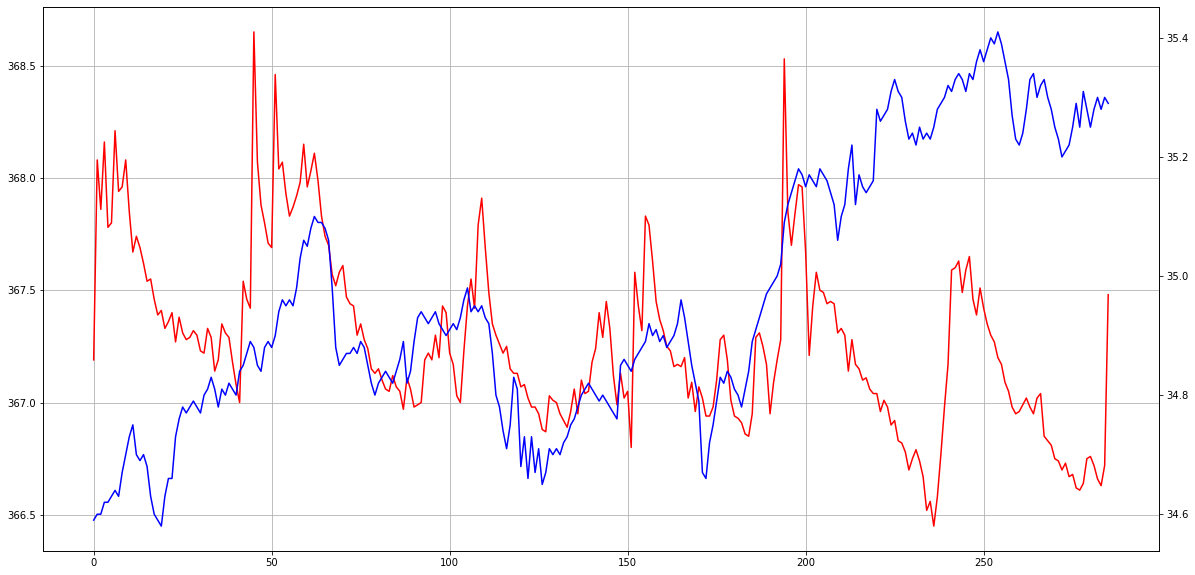

In [120]:
plt.figure(figsize=(20,10))
#plt.plot(sd["BB_25480026"]);
sd["TH_5633900056"].plot(color='red',grid=True) # this t.s has less than 500 time values
sd["BB_25480025"].plot(color='blue',grid=True, secondary_y=True)

In [ ]:
##############################

# with this analysis , I could extract the temprature in all dates over the 17 years -> I will get df of 12825x6205 (t.s x days) similar to the grouped_t_s then there is no need to take the avarage